In [ ]:
import torch
import numpy as np

In [3]:
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Input
x = torch.tensor([3.0])

In [4]:
#Forward pass
y_pred = w * x + b
print(f"y_pred: {y_pred.item()}")

y_pred: 7.0


In [5]:
#Loss
y_true = torch.tensor([10.0])
loss = (y_pred - y_true) ** 2
print(f"Loss: {loss.item()}")

Loss: 9.0


In [6]:
print(f"Avant backward: w.grad = {w.grad}")

Avant backward: w.grad = None


In [7]:
loss.backward()

In [8]:
print(f"Après backward: w.grad = {w.grad}")
print(f"Après backward: b.grad = {b.grad}")

Après backward: w.grad = tensor([-18.])
Après backward: b.grad = tensor([-6.])


In [9]:
# Update manuel des poids
learning_rate = 0.01
with torch.no_grad():  #Désactiver le tracking des gradients pour l'update w = w + alpha * w
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

In [10]:
print(f"Nouveaux poids: w = {w}, b = {b}")

Nouveaux poids: w = tensor([2.1800], requires_grad=True), b = tensor([1.0600], requires_grad=True)


In [11]:
#Réinitialiser les gradients (IMPORTANT !)
w.grad.zero_()
b.grad.zero_()
print(f"Après zero_: w.grad = {w.grad}, b.grad = {b.grad}")

Après zero_: w.grad = tensor([0.]), b.grad = tensor([0.])


In [12]:
import torch.nn as nn 

perceptron = nn.Linear(1, 1)

#Voir les poids initiaux
print(f"Poids: {perceptron.weight}")
print(f"Biais: {perceptron.bias}")

Poids: Parameter containing:
tensor([[0.5113]], requires_grad=True)
Biais: Parameter containing:
tensor([-0.5247], requires_grad=True)


In [13]:
# Forward
x = torch.tensor([[3.0]]) # Shape (batch_size, features)
print(f"input: {x}")
y_pred = perceptron(x)
print(y_pred)

input: tensor([[3.]])
tensor([[1.0093]], grad_fn=<AddmmBackward0>)


In [14]:
# Loss
y_true = torch.tensor([[10.0]])
criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)

In [15]:
loss

tensor(80.8328, grad_fn=<MseLossBackward0>)

In [16]:
#Backward
loss.backward()

In [17]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: tensor([[-53.9443]])
Gradient du biais: tensor([-17.9814])


In [18]:
import torch.optim as optim
optimizer = optim.SGD(perceptron.parameters(), lr=0.01)

In [19]:
optimizer.step()

In [20]:
print(f"Nouveaux poids: {perceptron.weight} {perceptron.bias}")

Nouveaux poids: Parameter containing:
tensor([[1.0508]], requires_grad=True) Parameter containing:
tensor([-0.3449], requires_grad=True)


In [21]:
optimizer.zero_grad()

In [22]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: None
Gradient du biais: None


In [23]:
class SimpleNet(nn.Module) : 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [24]:
model = SimpleNet()

In [25]:
model

SimpleNet(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [26]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([5.0])
y_pred = model(x)
loss = nn.MSELoss()(y_pred, y)

loss.backward()

In [27]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, Normalize
import matplotlib.pyplot as plt

In [28]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [29]:
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, pin_memory=True, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False, pin_memory=True, num_workers=4)

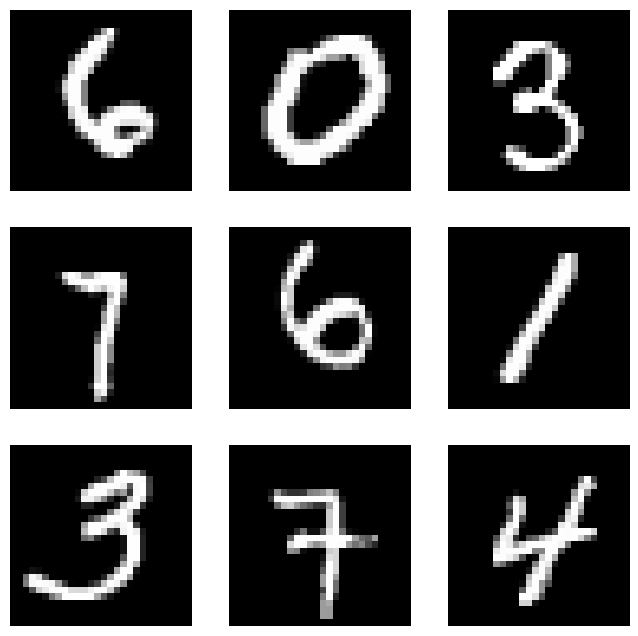

In [30]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [31]:
print(training_data.classes)
print(training_data.data.size())

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])


In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc(x)
        return logits

In [33]:
print(torch.__version__)

2.6.0.dev20241112+cu121


In [34]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using device: {device}")
model = NeuralNetwork().to(device)
print(model)

Using device: cuda
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [35]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)

In [36]:
logits

tensor([[ 0.1442, -0.0351,  0.0640,  0.0011,  0.1327,  0.0521,  0.0944, -0.0304,
          0.0039, -0.1137]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [37]:
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab

tensor([[0.1116, 0.0933, 0.1030, 0.0967, 0.1103, 0.1018, 0.1062, 0.0937, 0.0970,
         0.0862]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [38]:
y_pred = pred_probab.argmax(1)
y_pred

tensor([0], device='cuda:0')

In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [40]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch_idx, batch_value in enumerate(dataloader):
        X, y = batch_value
        X, y = X.to(device), y.to(device)

        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_idx % 100 == 0:
            loss, current = loss.item(), (batch_idx+1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5}]")


In [52]:
def test(dataloader, model, loss_fn):
    size = len (dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss/=num_batches
    correct/=size
    print(f"Test Error: \n Accuaracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [62]:
# Assurez-vous que le modèle est bien sur le GPU avant de commencer
model.to(device)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    train(training_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
---------------------
loss: 0.173667  [   64/60000]
loss: 0.056677  [ 6464/60000]
loss: 0.097287  [12864/60000]
loss: 0.358566  [19264/60000]
loss: 0.184349  [25664/60000]
loss: 0.185151  [32064/60000]
loss: 0.072494  [38464/60000]
loss: 0.134824  [44864/60000]
loss: 0.116970  [51264/60000]
loss: 0.042755  [57664/60000]
Test Error: 
 Accuaracy: 95.7%, Avg loss: 0.140216 

Epoch 2
---------------------
loss: 0.113894  [   64/60000]
loss: 0.137595  [ 6464/60000]
loss: 0.084001  [12864/60000]
loss: 0.216962  [19264/60000]
loss: 0.129510  [25664/60000]
loss: 0.074802  [32064/60000]
loss: 0.179214  [38464/60000]
loss: 0.107252  [44864/60000]
loss: 0.143951  [51264/60000]
loss: 0.183223  [57664/60000]
Test Error: 
 Accuaracy: 95.4%, Avg loss: 0.148490 

Epoch 3
---------------------
loss: 0.092988  [   64/60000]
loss: 0.198373  [ 6464/60000]
loss: 0.199868  [12864/60000]
loss: 0.221326  [19264/60000]
loss: 0.120574  [25664/60000]
loss: 0.078816  [32064/60000]
loss: 0.157214  [38464/6

In [ ]:
#cela n'a pas marché du coup j'ai fait autre chose en bas 

example_inputs = (torch)
model.to("cpu")
onnx_program = torch.onnx.export(model, example_inputs, dynamo=True)
onnx_program.save("model.onnx")

TypeError: 'module' object is not subscriptable

In [ ]:
import torch

model.to("cpu")
model.eval()

dummy_input = torch.randn(1, 28, 28)

export_output = torch.onnx.export(
    model, 
    (dummy_input,), 
    dynamo=True
)
 
export_output.save("model.onnx")
print("Modèle exporté : model.onnx")

[torch.onnx] Obtain model graph for `NeuralNetwork([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `NeuralNetwork([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
✅ Modèle exporté : model.onnx
